# Boston housing data
1.  CRIM      per capita crime rate by town
2.  ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3.  INDUS     proportion of non-retail business acres per town
4.  CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.  NOX       nitric oxides concentration (parts per 10 million)
6.  RM        average number of rooms per dwelling
7.  AGE       proportion of owner-occupied units built prior to 1940
8.  DIS       weighted distances to five Boston employment centres
9.  RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

## Julia
- Install julia from  https://julialang.org/downloads/
- To add packages, switch to package mode by typing `]`, then `add <package>`
- Reopen vscode and select Julia kernel
- Can activate environment using `activate home_project` and this will create Project and Manifest files

In [1]:
# setup environment using toml files in current directory
cd(@__DIR__)
using Pkg
Pkg.activate(".")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.build("Plots")
Pkg.add("Distributions")
# Pkg.add("Blink")
Pkg.add("StatsBase")
Pkg.add("GR")
Pkg.add("CSV")
Pkg.add("Downloads")
Pkg.add("Arrow")
Pkg.add("FreqTables")
Pkg.add("SHA")



  Activating environment at `~/ManningLiveProjects/julia/Project.toml`
    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
    Updating `~/ManningLiveProjects/julia/Manifest.toml`
  [621f4979] - AbstractFFTs v1.0.1
  [7d9fca2a] - Arpack v0.4.0
  [13072b0f] - AxisAlgorithms v1.0.0
  [aaaa29a8] - Clustering v0.14.2
  [944b1d66] - CodecZlib v0.7.0
  [e7dc6d0d] - DataValues v0.4.13
  [b4f34e82] - Distances v0.10.3
  [7a1cc6ca] - FFTW v1.4.3
  [5789e2e9] - FileIO v1.10.1
  [a98d9a8b] - Interpolations v0.13.3
  [5ab0869b] - KernelDensity v0.6.3
  [6f286f6a] - MultivariateStats v0.8.0
  [b8a86587] - NearestNeighbors v0.4.9
  [6fe1bfb0] - OffsetArrays v1.10.3
  [58dd65bb] - Plotly v0.3.0
  [a03496cd] - PlotlyBase v0.5.4
  [f0f68f2c] - PlotlyJS v0.14.1
  [438e738f] - PyCall v1.92.3
  [d330b81b] - PyPlot v2.9.0
  [df47a6cb] - RData v0.8.3
  [ce6b1742] - RDatasets v0.7.5
  [c84ed2f1] - Ratios v0.4.0
  [

In [2]:
import Downloads
import SHA
using Arrow
using DataFrames, Random, DelimitedFiles, CSV
using Plots
using FreqTables
using Statistics
using StatsBase
using SHA


1.1 Download dataset

In [3]:

function f()    
    if isfile("./data/housing.data") == false
        Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data","./data/housing.data")
        Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names","./data/housing.names")
    end
end

f()

1.2 Compute and verify hash of downloaded file


In [8]:

expected = bytes2hex([0xad, 0xfa, 0x6b, 0x6d, 0xca,
0x24, 0xa6, 0x3f, 0xe1, 0x66,
0xa9, 0xe7, 0xfa, 0x01, 0xce,
0xe4, 0x33, 0x58, 0x57, 0xd1])

#open downloaded file and compute hash
open("./data/housing.data") do f
    result = bytes2hex(sha1(f))
    println("hash match: ", result == expected, " = ", result)    
end

hash match: true = adfa6b6dca24a63fe166a9e7fa01cee4335857d1


1.3 Loading data into dataframe: https://github.com/bkamins/
Julia-DataFrames-Tutorial

In [9]:
# need to install DataFrames package for the following
ENV["COLUMNS"]= 200


#df = DataFrame(readdlm("housing.data"), [:CRIM,:ZN,:INDUS,:CHAS,:NOX,:RM,:AGE,:DIS,:RAD,:TAX,:PTRATIO,:B,:LSTAT,:MEDV])
df = CSV.read("./data/housing.data", DataFrame; header=[:CRIM,:ZN,:INDUS,:CHAS,:NOX,:RM,:AGE,:DIS,:RAD,:TAX,:PTRATIO,:B,:LSTAT,:MEDV], 
    ignorerepeated=true,delim=' ', threaded=false, tasks=1)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.9,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.6,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.9,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


1.4. Variable characterisitics
- Nominal variables
    - CHAS
- Continuous are the rest

In [10]:
names(df)
nominal_vars = names(df, Int64)
continuous_vars = names(df, Float64)

println(nominal_vars)
println(continuous_vars)

["CHAS", "RAD"]
["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]


In [11]:
#plot(df.MEDV)
#using Plots, StatsBase
hist(col) =
    histogram(df[!,col], title=col)

hist (generic function with 1 method)

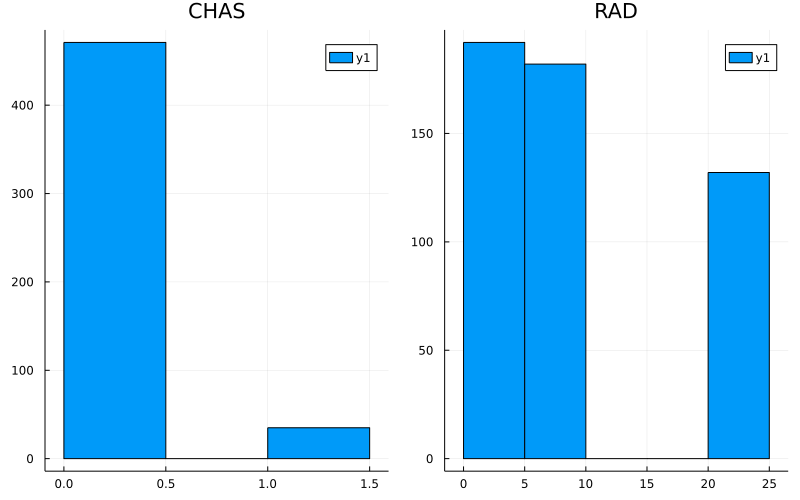

In [12]:
# histogram nominal
plot(map(x -> hist(x), nominal_vars)..., layout=grid(1, 2), size=(800,500))

1.6 Distribution of continous variables

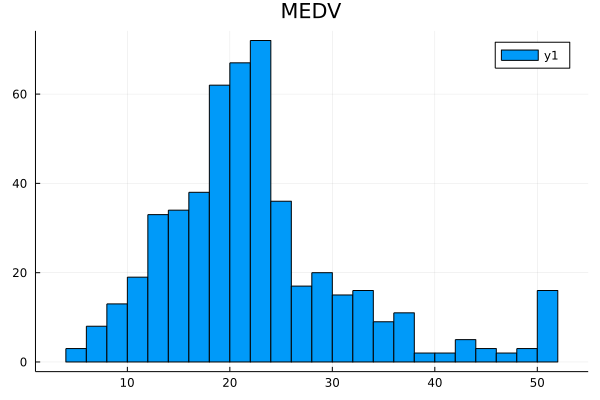

In [13]:

#using Distributions



hist("MEDV")

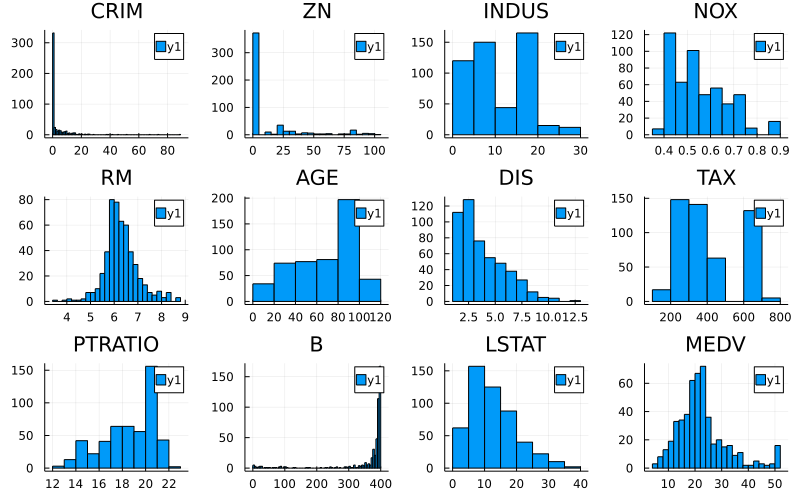

In [14]:
plot(map(x -> hist(x), continuous_vars)..., layout=grid(3, 4), size=(800,500))

1.7 Remove MEDV where = 50

In [15]:
df = filter(row -> !(row.MEDV == 50 ),  df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.9,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.6,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.9,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


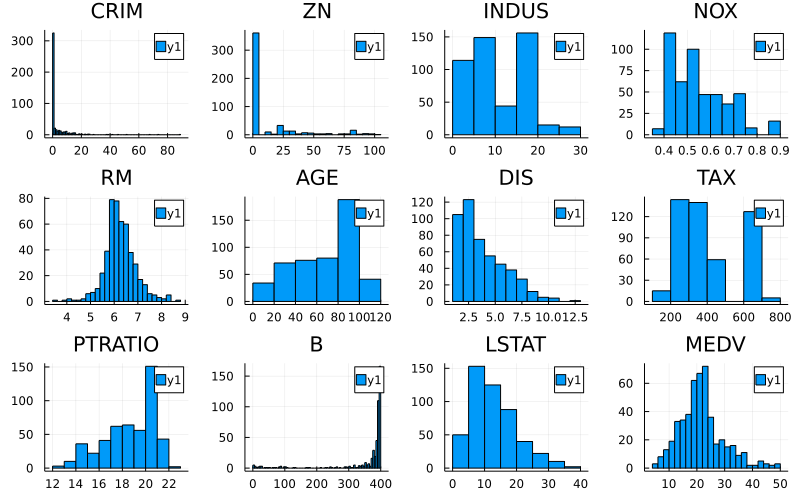

In [16]:
plot(map(x -> hist(x), continuous_vars)..., layout=grid(3, 4), size=(800,500))

1.8 Kendalls's Tau correlation

In [17]:
# using StatsPlots
# gr(size=(600,600))

using StatsBase
housing_cor = corkendall(Matrix(df))

14×14 Matrix{Float64}:
  1.0        -0.458266    0.520867    0.0187153    0.594802  -0.218774    0.489837   -0.5359      0.556161     0.535601   0.316977   -0.255792    0.483386    -0.438928
 -0.458266    1.0        -0.530466   -0.0364009   -0.514629   0.279787   -0.424882    0.484681   -0.224992    -0.273946  -0.357918    0.121932   -0.399438     0.3565
  0.520867   -0.530466    1.0         0.0570377    0.616625  -0.299508    0.483657   -0.57237     0.350976     0.474513   0.341488   -0.185451    0.493072    -0.448465
  0.0187153  -0.0364009   0.0570377   1.0          0.046477   0.0163709   0.0384825  -0.0376498   0.00896455  -0.065365  -0.12019    -0.026583    0.00639807   0.0700622
  0.594802   -0.514629    0.616625    0.046477     1.0       -0.224779    0.587438   -0.685598    0.426594     0.444464   0.285893   -0.193448    0.479634    -0.428623
 -0.218774    0.279787   -0.299508    0.0163709   -0.224779   1.0        -0.19728     0.197309   -0.0708855   -0.185187  -0.196914    0.03

1.9 Correlation heatmap 

In [18]:
# get sort array indices
housing_sort = sortperm(housing_cor[:, end])

names(df)[housing_sort]

14-element Vector{String}:
 "LSTAT"
 "INDUS"
 "TAX"
 "CRIM"
 "NOX"
 "AGE"
 "PTRATIO"
 "RAD"
 "CHAS"
 "B"
 "ZN"
 "DIS"
 "RM"
 "MEDV"

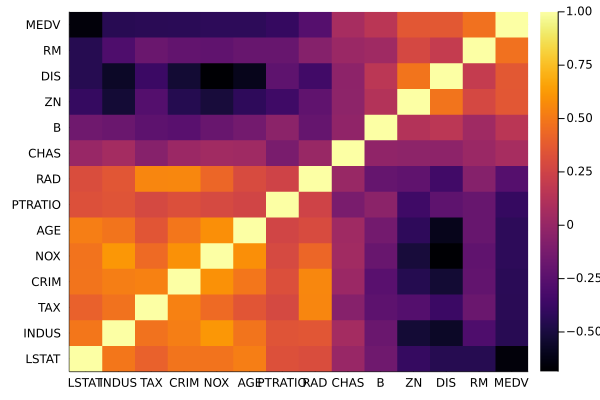

In [19]:
# heatmap
#using PlotlyBase
heatmap(names(df)[housing_sort], names(df)[housing_sort], housing_cor[housing_sort, housing_sort])




1.10 Produce dataframe showing all vars and their correlation with MEDV

In [20]:
# produce dataframe and sort by absolute correlation with MEDV
sort(DataFrame(vars=names(df), cors=housing_cor[:, end]) , :cors, by=abs)

,vars,cors
,String,Float64
1,CHAS,0.0700622
2,B,0.152093
3,RAD,-0.270892
4,ZN,0.3565
5,DIS,0.360628
6,PTRATIO,-0.396202
7,AGE,-0.427413
8,NOX,-0.428623
9,CRIM,-0.438928


1.11 Plot scatterplot of continuous vars against MEDV

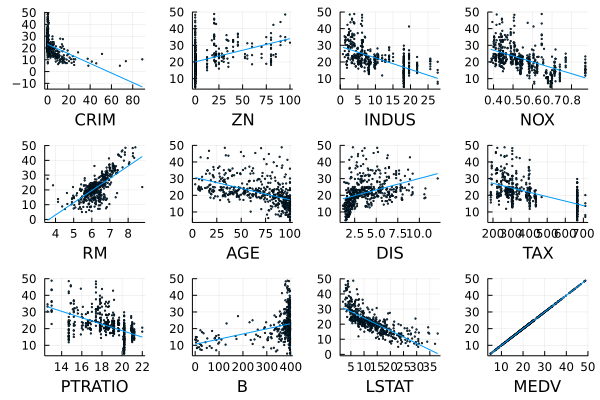

In [22]:
scatterplot(column_name) =
    scatter(df[!, column_name], df.MEDV, xlabel=column_name,
            legend=false, smooth=true, ms=1)

plot(map(x -> scatterplot(x), continuous_vars)..., layout=grid(3, 4))

1.12 Remove feature B as this is  least correlated continuous var to MDEV

In [23]:
select!(df, Not(:B))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0,18.7,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,29.93,16.5


1.13 Transform skewed columns to log and bin ZN column


["CRIM", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "LSTAT", "MEDV"]


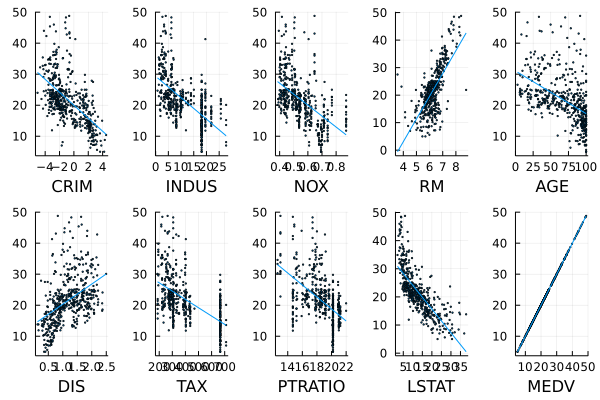

In [24]:
# do inplace transformation
transform!(df,
           :CRIM => ByRow(l -> log(l)), :DIS => ByRow(l -> log(l)), :ZN => ByRow(>(0)),
           renamecols=false)


# get the continuous names remaining
continuous_vars = names(df, Union{Float64, ComplexF64})   
println(continuous_vars)        

#show plots again
plot(map(x -> scatterplot(x), continuous_vars)..., layout=grid(2, 5))           

In [25]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
,Float64,Bool,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64
1,-5.06404,1,2.31,0,0.538,6.575,65.2,1.40854,1,296.0,15.3,4.98,24.0
2,-3.6005,0,7.07,0,0.469,6.421,78.9,1.60284,2,242.0,17.8,9.14,21.6
3,-3.60123,0,7.07,0,0.469,7.185,61.1,1.60284,2,242.0,17.8,4.03,34.7
4,-3.43052,0,2.18,0,0.458,6.998,45.8,1.80207,3,222.0,18.7,2.94,33.4
5,-2.67292,0,2.18,0,0.458,7.147,54.2,1.80207,3,222.0,18.7,5.33,36.2
6,-3.51157,0,2.18,0,0.458,6.43,58.7,1.80207,3,222.0,18.7,5.21,28.7
7,-2.42713,1,7.87,0,0.524,6.012,66.6,1.71569,5,311.0,15.2,12.43,22.9
8,-1.93413,1,7.87,0,0.524,6.172,96.1,1.78348,5,311.0,15.2,19.15,27.1
9,-1.55476,1,7.87,0,0.524,5.631,100.0,1.80535,5,311.0,15.2,29.93,16.5


1.14,15,16 from solution


In [26]:
function gen_meanCI(x)
    boot = [mean(rand(x, length(x))) for _ in 1:10_000]
    return (mean=mean(x), q5=quantile(boot, 0.05), q95=quantile(boot, 0.95))
end

gen_meanCI (generic function with 1 method)

In [27]:
# Mean and 90% CI ends per group for :CHAS variable
mean_chas = combine(groupby(df, :CHAS, sort=true), :MEDV => gen_meanCI => AsTable)

,CHAS,mean,q5,q95
,Int64,Float64,Float64,Float64
1,0,21.4885,20.8947,22.0976
2,1,23.9793,21.9207,26.1174


In [32]:
mean_rad = combine(groupby(df, :RAD, sort=true), :MEDV => gen_meanCI => AsTable)

,RAD,mean,q5,q95
,Int64,Float64,Float64,Float64
1,1,23.0158,21.0368,25.0211
2,2,26.8333,24.304,29.4833
3,3,27.3324,25.3161,29.3676
4,4,20.8574,19.9481,21.7945
5,5,24.3697,23.2073,25.5616
6,6,20.9769,20.2538,21.7038
7,7,27.1059,24.6879,29.7588
8,8,29.5043,26.5739,32.5957
9,24,15.0811,14.3031,15.8693


In [29]:
# Mean and 90% CI ends per group for :ZN variable
mean_zn = combine(groupby(df, :ZN, sort = true), :MEDV => gen_meanCI => AsTable)

,ZN,mean,q5,q95
,Bool,Float64,Float64,Float64
1,0,19.5737,18.9698,20.1875
2,1,27.407,26.369,28.4651


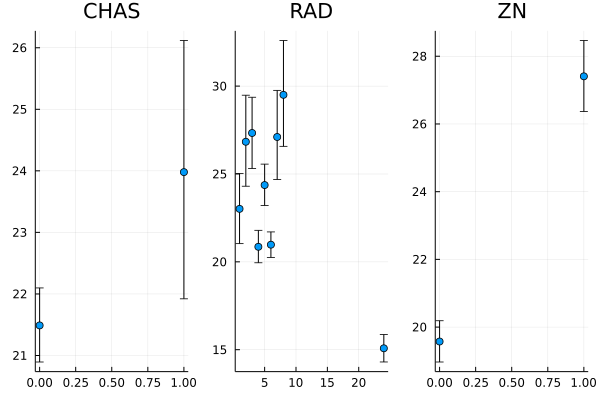

In [33]:
plot(plot(mean_chas.CHAS, mean_chas.mean,
          yerror=(mean_chas.mean - mean_chas.q5, mean_chas.q95 - mean_chas.mean),
          label=nothing, title="CHAS", seriestype=:scatter),
     plot(mean_rad.RAD, mean_rad.mean,
          yerror=(mean_rad.mean - mean_rad.q5, mean_rad.q95 - mean_rad.mean),
          label=nothing, title="RAD", seriestype=:scatter),
     plot(mean_zn.ZN, mean_zn.mean,
          yerror=(mean_zn.mean - mean_zn.q5, mean_zn.q95 - mean_zn.mean),
          label=nothing, title="ZN", seriestype=:scatter),
    layout=grid(1, 3))

In [35]:
select!(df, Not(:RAD))

# Have a look at the data after cleaning
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,CRIM,-0.795081,-5.06404,-1.39635,4.48837,0,Float64
2,ZN,0.263265,0,0.0,1,0,Bool
3,INDUS,11.1131,0.74,9.69,27.74,0,Float64
4,CHAS,0.0591837,0,0.0,1,0,Int64
5,NOX,0.554307,0.385,0.538,0.871,0,Float64
6,RM,6.24547,3.561,6.185,8.78,0,Float64
7,AGE,68.279,2.9,76.8,100.0,0,Float64
8,DIS,1.20077,0.128393,1.18659,2.49539,0,Float64
9,TAX,408.002,187.0,330.0,711.0,0,Float64


In [37]:
Arrow.write("housing.arrow", df)